In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from arch.univariate import GARCH
from arch import arch_model

# Descriptive Statistics 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


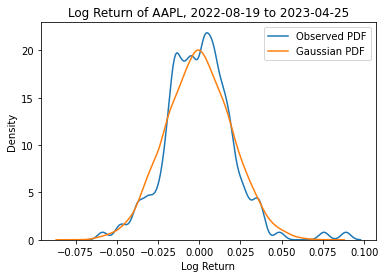

In [135]:
aapl = yf.download('AAPL',start='2022-08-19',end='2023-04-25')
aapl['Log Return'] = aapl['Adj Close']/aapl['Adj Close'].shift(1)-1
tsla = yf.download('TSLA',start='2023-01-01',end='2023-04-22')
tsla['Log Return'] = tsla['Adj Close']/tsla['Adj Close'].shift(1)-1
sns.kdeplot(data=aapl['Log Return'],bw_adjust=0.4,label='Observed PDF')

np.random.seed(0)

#create data
x = np.random.normal(loc=aapl['Log Return'].mean(),scale=aapl['Log Return'].std(),size=10000)
sns.kdeplot(data=x,label='Gaussian PDF').set(title="Log Return of AAPL, 2022-08-19 to 2023-04-25")
plt.legend()

#create normal distribution curve


In [134]:
aapl

,Open,High,Low,Close,Adj Close,Volume,Log Return
Date,,,,,,,
2022-08-19,173.029999,173.740005,171.309998,171.520004,170.974899,70346300,-0.015102
2022-08-22,169.690002,169.860001,167.139999,167.570007,167.037460,69026800,-0.023029
2022-08-23,167.080002,168.710007,166.649994,167.229996,166.698532,54147100,-0.002029
2022-08-24,167.320007,168.110001,166.250000,167.529999,166.997574,53841500,0.001794
2022-08-25,168.779999,170.139999,168.350006,170.029999,169.489624,51218200,0.014923
...,...,...,...,...,...,...,...
2023-04-18,166.100006,167.410004,165.649994,166.470001,166.470001,49923000,0.007505
2023-04-19,165.800003,168.160004,165.539993,167.630005,167.630005,47720200,0.006968
2023-04-20,166.089996,167.869995,165.559998,166.649994,166.649994,52456400,-0.005846


In [72]:
len(aapl)

171

In [27]:
#garch = arch.univariate.GARCH(1,1).fit()
model = arch_model()

AttributeError: 'GARCH' object has no attribute 'fit'

# Sample Variance

In [41]:
tsla_hist = yf.download('AAPL',start='2021-06-01',end='2023-04-25')
tsla_hist['Log Return'] = tsla_hist['Adj Close']/tsla_hist['Adj Close'].shift(1)-1
tsla_hist = tsla_hist.dropna()
tsla_hist['Predicted Volatility'] = tsla_hist['Log Return'].rolling(window=30).std()**2
tsla_hist = tsla_hist.dropna()
tsla_hist["Realized Volatility"] =tsla_hist['Predicted Volatility'].shift(1)
data_tsla = tsla_hist['Log Return']
tsla_hist = tsla_hist['2022-08-18':'2023-04-25']
tsla_hist['Error  (sample variance)'] = np.abs(tsla_hist["Realized Volatility"]-tsla_hist["Predicted Volatility"] )
tsla_hist['Error  (sample variance)'].sum()

[*********************100%***********************]  1 of 1 completed


C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\4008385612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_hist['Predicted Volatility'] = tsla_hist['Log Return'].rolling(window=30).std()**2
C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\4008385612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_hist["Realized Volatility"] =tsla_hist['Predicted Volatility'].shift(1)
C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\4008385612.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

0.0033938897791937622

In [243]:
aapl_hist = yf.download('AAPL',start='2021-06-01',end='2023-04-25')
aapl_hist['Log Return'] = aapl_hist['Adj Close']/aapl_hist['Adj Close'].shift(1)-1
aapl_hist = aapl_hist.dropna()
aapl_hist['Realized Volatility'] = aapl_hist['Log Return'].rolling(window=30).std()**2
aapl_hist["Predicted Volatility"] =aapl_hist['Realized Volatility'].shift(1)
aapl_hist = aapl_hist.dropna()

data_aapl = aapl_hist['Log Return']
aapl_hist = aapl_hist['2022-08-18':'2023-04-25']
aapl_hist['Error  (sample variance)'] = np.abs(aapl_hist["Realized Volatility"]-aapl_hist["Predicted Volatility"] )
aapl_hist
aapl_hist['Error  (sample variance)'].sum()/len(aapl_hist)



[*********************100%***********************]  1 of 1 completed


C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\1594864725.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_hist['Realized Volatility'] = aapl_hist['Log Return'].rolling(window=30).std()**2
C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\1594864725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_hist["Predicted Volatility"] =aapl_hist['Realized Volatility'].shift(1)


1.984730865025591e-05

In [184]:
aapl_hist['Predicted Volatility'].std()**2

5.2983566343633505e-08

<AxesSubplot:xlabel='Date'>

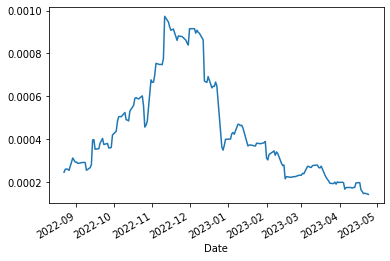

In [182]:
aapl_hist['Predicted Volatility'].plot()

In [178]:
data_aapl.to_csv('C:/Users/Sing/Desktop/study/study/ELEC/ELEC3180/project/aapl_log_rt.csv')

# GARCH Modelling

In [173]:
data_aapl = data_aapl.dropna()
##fitting aapl
model = arch_model(data_aapl, mean='Zero', vol='GARCH',p=1,q=1)
stepsize = 1
forecast = {}
for i in range(len(data_aapl)-20):

    model_fit = model.fit(first_obs =i,last_obs = i+20, disp='off')
    #print(model_fit)
    predict = model_fit.forecast(horizon=1,reindex=False).variance
    #print(predict)
    fcast= predict.iloc[0]
    #print(forecast)
    forecast[fcast.name] = fcast
forecastdf = pd.DataFrame(forecast).T
forecastdf

c:\Users\Sing\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001237. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Sing\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\univariate\base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001451. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\Sing\AppDat

,h.1
2021-08-11,0.000038
2021-08-12,0.000175
2021-08-13,0.000126
2021-08-16,0.000109
2021-08-17,0.000077
...,...
2023-04-17,0.000160
2023-04-18,0.000184
2023-04-19,0.000174
2023-04-20,0.000154


In [228]:
#forecastS = forecastdf.loc['2022-08-18':'2023-04-25']
#forecastS

np.abs(forecastdf['h.1'].iloc[-len(aapl):]-aapl_hist['Realized Volatility']).sum()/len(forecastdf['h.1'].iloc[-len(aapl)+2:])


0.00019723607088763308

In [183]:
forecastdf.iloc[-len(aapl)+2:].std()**2

h.1    2.988069e-07
dtype: float64

In [227]:
len(forecastdf.iloc[-len(aapl):])

171

# Option Implied Volatility

In [185]:
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import vega


In [211]:
def implied_vol(S0, K, T, r, market_price, flag='c', tol=0.00001):
    """Compute the implied volatility of a European Option
        S0: initial stock price
        K:  strike price
        T:  maturity
        r:  risk-free rate
        market_price: market observed price
        tol: user choosen tolerance
    """
    max_iter = 200 #max number of iterations
    vol_old = 0.30 #initial guess
    for k in range(max_iter):
        bs_price = bs(flag, S0, K, T, r, vol_old)
        Cprime =  vega(flag, S0, K, T, r, vol_old)*100
        C = bs_price - market_price
        vol_new = vol_old - C/Cprime
        bs_new = bs(flag, S0, K, T, r, vol_new)
        if (abs(vol_old - vol_new) < tol or abs(bs_new - market_price) < tol):
            break
        vol_old = vol_new
    implied_vol = vol_old
    return implied_vol

In [276]:
#compute implied volatility
aapl_call = pd.read_csv('C:/Users/Sing/Desktop/study/study/ELEC/ELEC3180/project/aaplCall.csv')
aapl_call.set_index('Date',inplace=True)
aapl_call['Implied Volatiliy'] = aapl_call['Adj Close']
nanCount = 0
for i in range(len(aapl_call)):
    aapl_call['Implied Volatiliy'].iloc[i] = implied_vol(S0=aapl_hist['Close'].loc[aapl_call.index[i]],K=165,r=0,T=len(aapl_call)-i,market_price=aapl_call['Adj Close'].iloc[i],flag='c')
    if (np.isnan(aapl_call['Implied Volatiliy'].iloc[i])):
        nanCount+=1
        aapl_call['Implied Volatiliy'].iloc[i] = aapl_hist["Realized Volatility"].loc[aapl_call.index[i]]
aapl_put = pd.read_csv('C:/Users/Sing/Desktop/study/study/ELEC/ELEC3180/project/aaplPut.csv')
aapl_put.set_index('Date',inplace=True)
aapl_put['Implied Volatiliy'] = aapl_put['Adj Close']
PutnanCount = 0
for i in range(len(aapl_put)):
    aapl_put['Implied Volatiliy'].iloc[i] = implied_vol(S0=aapl_hist['Close'].loc[aapl_put.index[i]],K=165,r=0,T=len(aapl_put)-i,market_price=aapl_put['Adj Close'].iloc[i],flag='p')
    if (np.isnan(aapl_put['Implied Volatiliy'].iloc[i])):
        PutnanCount+=1
        aapl_put['Implied Volatiliy'].iloc[i] = aapl_hist["Realized Volatility"].loc[aapl_put.index[i]]

C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\1231016462.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  vol_new = vol_old - C/Cprime
c:\Users\Sing\AppData\Local\Programs\Python\Python39\lib\site-packages\py_vollib\ref_python\black_scholes\__init__.py:87: RuntimeWarning: invalid value encountered in double_scalars
  return numerator / denominator
C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\3912705600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_call['Implied Volatiliy'].iloc[i] = implied_vol(S0=aapl_hist['Close'].loc[aapl_call.index[i]],K=165,r=0,T=len(aapl_call)-i,market_price=aapl_call['Adj Close'].iloc[i],flag='c')
C:\Users\Sing\AppData\Local\Temp\ipykernel_58784\3912705600.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [278]:
aapl_call_iv = aapl_call['Implied Volatiliy']
aapl_call_iv = aapl_call_iv.dropna()
converged = len(aapl_call) - nanCount
np.abs(aapl_call['Implied Volatiliy'].reset_index(drop=True)-aapl_hist["Realized Volatility"].iloc[1:-1].reset_index(drop=True)).sum()/converged

putConverged = len(aapl_put) - PutnanCount
np.abs(aapl_put['Implied Volatiliy'].reset_index(drop=True)-aapl_hist["Realized Volatility"].iloc[1:-1].reset_index(drop=True)).sum()/putConverged

0.04032508172942113

In [285]:
aapl_call.shift(1)

,Open,High,Low,Close,Adj Close,Volume,Implied Volatiliy
Date,,,,,,,
2022-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-22,23.219999,23.219999,22.910000,22.910000,22.910000,2.0,0.000245
2022-08-23,20.700001,20.700001,20.450001,20.450001,20.450001,1.0,0.000259
2022-08-24,20.350000,20.350000,20.000000,20.000000,20.000000,44.0,0.000260
2022-08-25,19.400000,19.400000,19.000000,19.400000,19.400000,8.0,0.000259
...,...,...,...,...,...,...,...
2023-04-17,1.870000,2.840000,1.350000,1.790000,1.790000,8949610.0,0.010433
2023-04-18,1.780000,1.930000,1.160000,1.610000,1.610000,13596256.0,0.010131
2023-04-19,2.070000,3.060000,1.730000,2.300000,2.300000,11071802.0,0.010949


In [286]:
np.abs(aapl_call['Implied Volatiliy'].shift(1).reset_index(drop=True)-aapl_hist["Realized Volatility"].iloc[1:-1].reset_index(drop=True)).sum()/converged


0.016885597214323284

In [288]:
aapl_call['Implied Volatiliy'].std()**2

0.0005832438695090436

# Stochastic Volatility 

In [289]:
sv_pred = pd.read_csv("C:/Users/Sing/Desktop/study/study/ELEC/ELEC3180/project/sv_prediction.csv")

In [309]:
stochastic = sv_pred[-169:-1].reset_index(drop=True)
np.abs(stochastic['x']-aapl_hist["Realized Volatility"].iloc[2:-1].reset_index(drop=True)).sum()/len(stochastic)

0.020042231952201412

<AxesSubplot:>

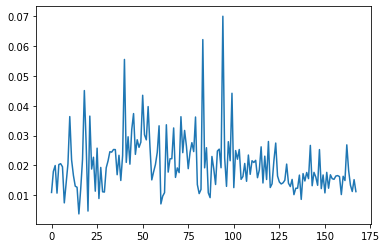

In [311]:
stochastic['x'].plot()